In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from datetime import datetime

In [4]:
#selected = ['WALMEX', 'GRUMAB', 'PE&OLES']
# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'Qa3CCQjeQQM2EZtv-rvh'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

In [5]:
table

adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2014-01-02  19.116238  12.726742  24.266002  150.10  71.343743
2014-01-03  19.107861  12.784441  24.248354  149.56  71.108673
2014-01-06  19.132992  12.842140  24.054226  147.00  70.710863
2014-01-07  19.334039  12.677286  24.080698  149.36  70.927850
2014-01-08  19.132992  12.809169  24.010106  151.28  70.367299
...               ...        ...        ...     ...        ...
2016-12-23  23.895555  11.800021  31.055560  213.34  68.153672
2016-12-27  23.828189  11.733729  31.075043  219.53  68.310482
2016-12-28  23.520232  11.601144  30.880215  219.74  67.928257
2016-12-29  23.799318  11.582204  30.889956  214.68  67.879254
2016-12-30  23.712705  11.487500  30.782801  213.69  67.742045

[756 rows x 5 columns]

In [6]:
import yfinance as yf

msft = yf.Tickers("spy qqq")

In [9]:
table = msft.history()['Close']
table

[*********************100%***********************]  2 of 2 completed


,QQQ,SPY
Date,,
2020-09-28,277.200012,334.190002
2020-09-29,275.950012,332.369995
2020-09-30,277.839996,334.890015
2020-10-01,282.250000,337.040009
2020-10-02,274.309998,333.839996
2020-10-05,280.160004,339.760010
2020-10-06,275.160004,334.929993
2020-10-07,279.920013,340.760010
2020-10-08,281.410004,343.779999


In [10]:
selected = ["SPY","QQQ"]

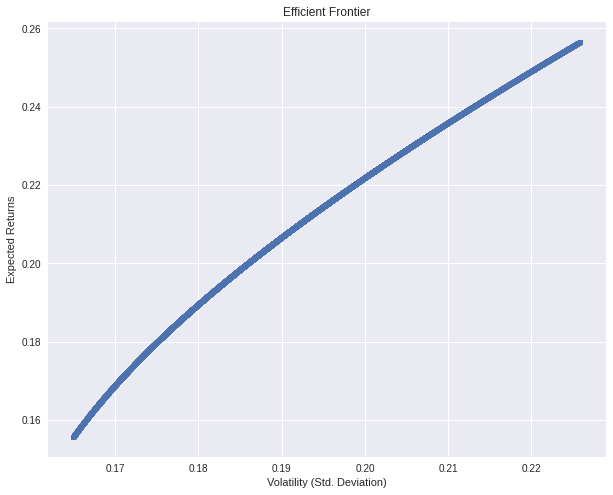

In [11]:


# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

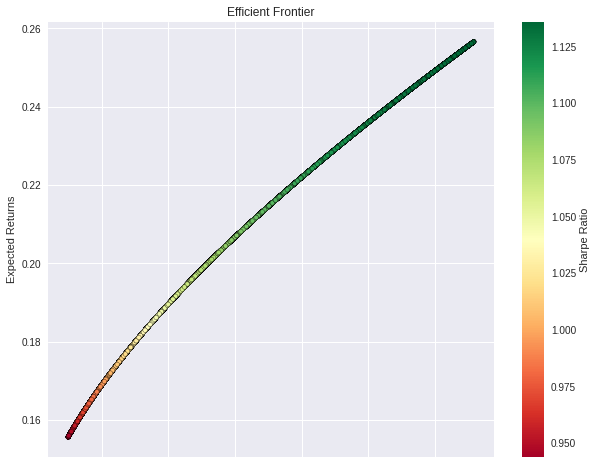

In [13]:
# }
# # get adjusted closing prices of 5 selected companies with Quandl
# quandl.ApiConfig.api_key = 'Qa3CCQjeQQM2EZtv-rvh'
# selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
# data = quandl.get_table('WIKI/PRICES', ticker = selected,
#                         qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
#                         date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)

# # reorganise data pulled by setting date as index with
# # columns of tickers and their corresponding adjusted prices
# clean = data.set_index('date')
# table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

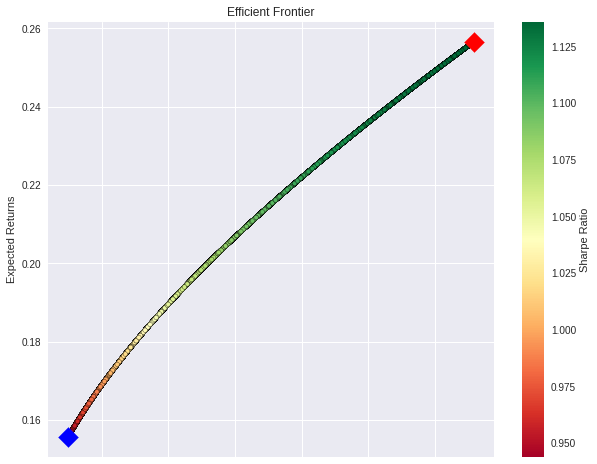

In [14]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [7]:
print(min_variance_port.T)

                 17879
Returns       0.045828
Volatility    0.138552
Sharpe Ratio  0.330761
CNP Weight    0.240327
F Weight      0.104659
WMT Weight    0.257760
GE Weight     0.001487
TSLA Weight   0.395767


In [8]:
print(sharpe_portfolio.T)

                 31209
Returns       0.116145
Volatility    0.175045
Sharpe Ratio  0.663514
CNP Weight    0.372890
F Weight      0.008482
WMT Weight    0.404987
GE Weight     0.211450
TSLA Weight   0.002190


In [9]:
from pandas_datareader import data
import pandas as pd
from yahoo_finance import Share

In [10]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['WALMEX','GMEXICOB','PE&OLES']

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2015-01-16'
end_date = '2018-01-16'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.ix['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new indec
close= close.reindex(all_weekdays)


ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [ ]:
selected = ['WALMEX', 'GMEXICOB', 'PE&OLES']
# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'Qa3CCQjeQQM2EZtv-rvh'
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2015-01-16', 'lte': '2018-01-16' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = close

In [ ]:
table.head()

In [ ]:


# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:

table = close

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
print(min_variance_port.T)

In [ ]:
print(sharpe_portfolio.T)

In [ ]:
df.head()

In [ ]:
close_original=close.copy()

In [ ]:
close[selected[2]].plot()
plt.title(selected[2])

In [ ]:
close[selected[1]].plot()
plt.title(selected[1])

In [ ]:
close[selected[0]].plot()
plt.title(selected[0])

In [ ]:
close.GMEXICOB.plot()
plt.title(selected[2])

In [ ]:
for i in range(0,3):
    print selected[i]
    print close[selected[i]].describe()

In [ ]:
for i in range(0,3):
    print selected[i]
    print "precio del inicio"
    print close[selected[i]][0]
    print "precio actual"
    print close[selected[i]][len(close)-1]
    print "La media es: "
    print close[selected[i]].mean()
    print "La varianza es: "
    print (close[selected[i]].std())**2
    print "La volatilidad es: "
    print close[selected[i]].std()
    print "El rendimiento del portafolio es: " + str(int((close[selected[i]][len(close1)-1]/close[selected[i]][0])*100)-100)+ " %"

In [ ]:
close.cov()

In [ ]:
close.corr()

In [ ]:
for i in range(0,3):
    print selected[i]+ " : " +str(float(sharpe_portfolio[selected[i]+" Weight"]*2000000))

In [ ]:
close1=DataFrame(close.copy())

In [ ]:
close1.head()

In [ ]:
close1['PORT']=float(sharpe_portfolio[selected[0]+" Weight"]*2000000)*close1[selected[0]]+float(sharpe_portfolio[selected[1]+" Weight"]*2000000)*close1[selected[1]]+float(sharpe_portfolio[selected[2]+" Weight"]*2000000)*close1[selected[2]]

In [ ]:
close1.head()

In [ ]:
print close1.PORT.describe()

In [ ]:
print "PORT"
print "La media es: "
print close1.PORT.mean()
print "La varianza es: "
print (close1.PORT.std())**2
print "La volatilidad es: "
print close1.PORT.std()

In [ ]:
print "El rendimiento del portafolio es: " + str(int((close1.PORT[len(close1)-1]/close1.PORT[0])*100)-100)+ " %"

In [ ]:
close1.PORT[len(close1)-1]

In [ ]:
close1.PORT[0]

In [ ]:
close1.cov()

In [ ]:
close1.corr()

In [ ]:
close_original.head()

In [ ]:
close_anual=close_original[close_original.index[datetime.date(close_original.index())>datetime.date(2017,3,16)]]

In [ ]:
close_original['Fecha']=close_original.index

In [ ]:
datetime.date(1943,3, 13)

In [ ]:
close_original[close_original.Fecha]

In [ ]:
now = datetime.datetime.now()